In [16]:
from sklearn.datasets import load_svmlight_file
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
import numpy as np
import matplotlib.pyplot as plt
from scipy.sparse import csr_matrix, hstack

X,Y = load_svmlight_file("australian_scale.txt")  
Y = np.array(Y).reshape(690,1)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.33)
#导入数据集并切分   其中X为样本值  Y为目标值

In [17]:
#初始化各参数
theta = np.ones((X.shape[1], 1))
maxIteration = 200
Threshold = 0
learning_rate = 0.001
train_loss, test_loss, train_ACR, test_ACR = [], [], [], []

In [18]:
x_todense_T = [] # x_todense_T数组存储了x[i].todense().T的值
for i in range(X_train.shape[0]):
    x_todense_T.append(X_train[i].todense().T)
    
def calhinge_lossandgrad(theta,x,y):
    loss,grad = 0,0
    for j in range(x.shape[0]):
        v = y[j]*((theta.T).dot(x_todense_T[j])[0,0])
        loss += max(0,1-v)
        grad += 0 if v > 1 else -y[j]*x[j].todense()
    return (loss/x.shape[0],grad)


def calhinge_loss(theta, x, y):
    loss= 0
    for k in range(x.shape[0]):
        v = y[k]*((theta.T).dot(x[k].todense().T)[0,0])
        loss += max(0,1-v)
    return loss/x.shape[0]
    
def cal_accur(x,y,theta):
    hypothesis = x * theta
    hypothesis[hypothesis > Threshold] = 1
    hypothesis[hypothesis <= Threshold] = -1
    return np.count_nonzero(hypothesis == y)/ x.shape[0]

In [19]:
def gradientDescent(z):
    for i in range(maxIteration):
        current_train_loss, gradient = calhinge_lossandgrad(z,X_train,Y_train)
        train_loss.append(current_train_loss)
        test_loss.append( calhinge_loss(z,X_test,Y_test))
        z = z-learning_rate*gradient.T
        train_ACR.append(cal_accur(X_train,Y_train,z))
        test_ACR.append(cal_accur(X_test,Y_test,z))
        
gradientDescent(theta)

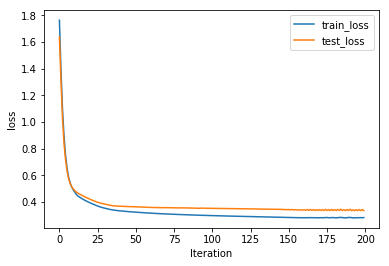

In [20]:
%matplotlib inline
plt.xlabel("Iteration")
plt.ylabel("loss")
plt.plot(train_loss, label="train_loss")
plt.plot(test_loss,label="test_loss" )
plt.legend(loc="upper right")

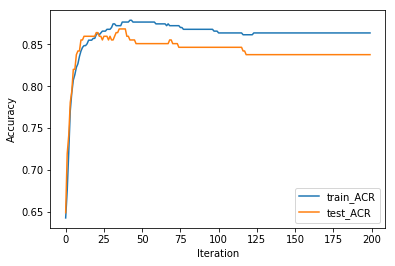

In [21]:
plt.xlabel("Iteration")
plt.ylabel("Accuracy")
plt.plot(train_ACR, label="train_ACR")
plt.plot(test_ACR, label="test_ACR")
plt.legend(loc="lower right")